## Decision trees in Python

Next we will see how we can implement this model in Python. To do so, we will use the `scikit-learn` library.

### Decision trees for classification

To exemplify the implementation of a classification tree we will use a dataset with few instances and which has been previously treated with a full EDA.

#### Step 1. Reading the processed dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


The train set will be used to train the model, while the test set will be used to evaluate the effectiveness of the model. In addition, the predictor variables do not need to be normalized, since decision trees are not affected by the scale of the data because of the way they work: they make decisions based on certain feature thresholds, regardless of their scale.

One way to visualize the relationship of variables to the target is by using a new type of graph, the `parallel_coordinates`. It is a data visualization technique used to plot multivariate numerical variables:

<Axes: >

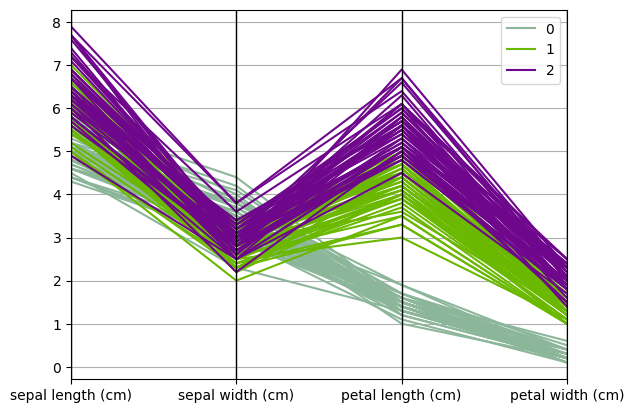

In [2]:
import pandas as pd

total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name")

Class `0` being an `iris setosa`, `1` an `iris verisocolor` and `2` an `iris virginica`, we can appreciate how the values of the predictors are distributed in the different flower classes. This can be a good graph to include in our EDA analysis from now on, as it helps us to identify patterns and correlations between variables.

#### Step 2: Model initialization and training

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Once the model has been trained correctly, we can visualize the tree with the same library. This visualization composes all the steps that the model has followed until the construction of the tree. Moreover, it is done in levels and from left to right:

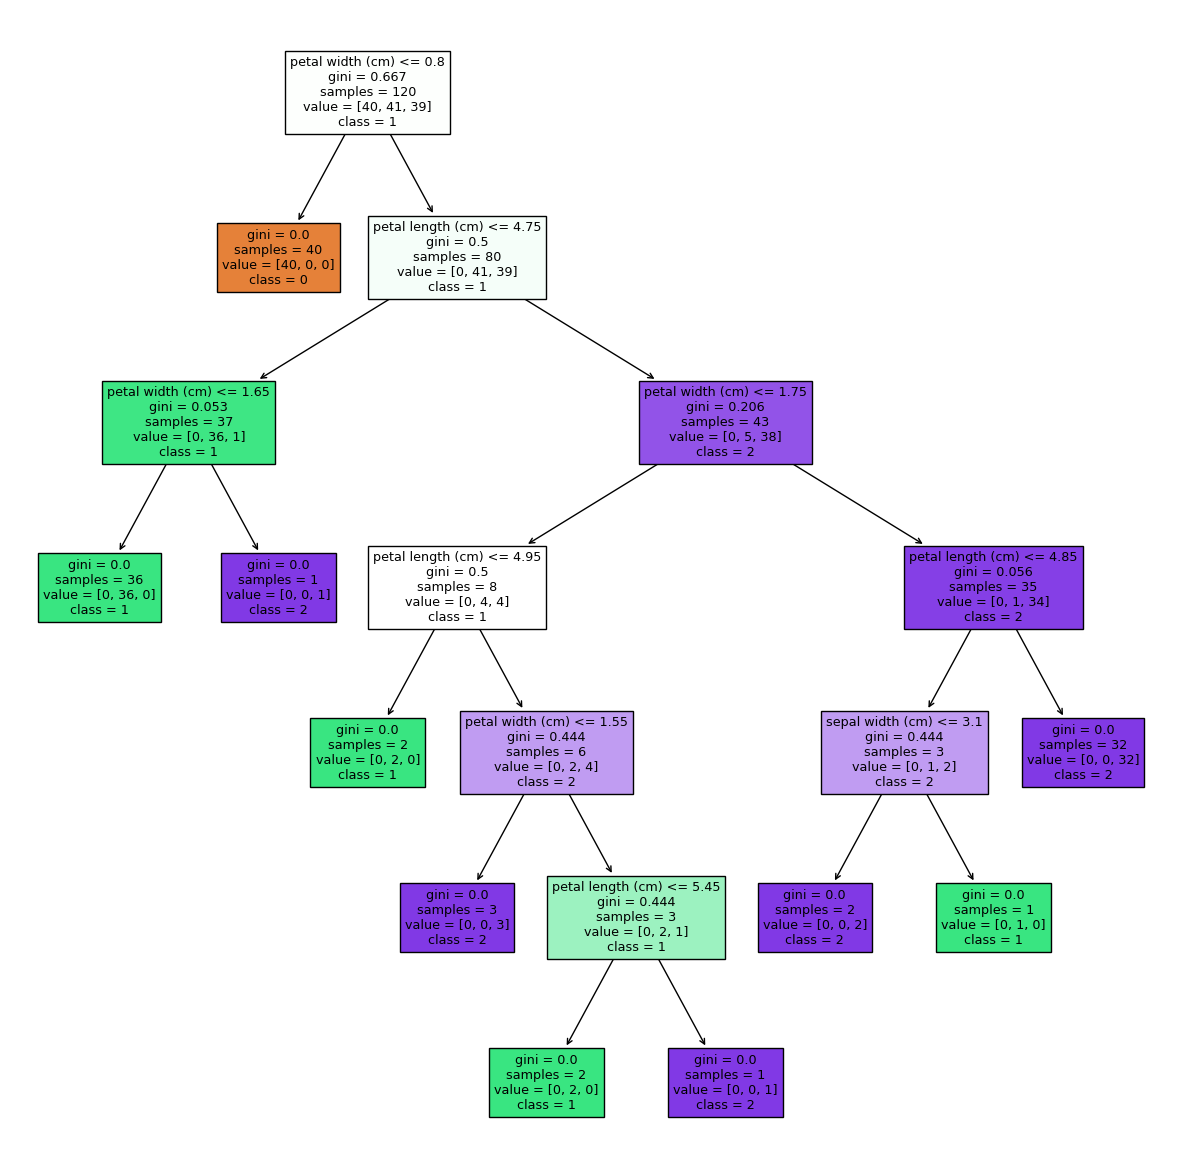

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model,
               feature_names = list(X_train.columns),
               class_names = ["0", "1", "2"],
               filled = True)

plt.show()

The training time of a model will depend, first of all, on the size of the dataset (instances and features), and also on the model type and its configuration.

#### Step 3: Model prediction

Once the model has been trained, it can be used to predict with the test data set.

In [5]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

With raw data it is very difficult to know whether the model is getting it right or not. To do this, we must compare it with reality. There are a large number of metrics to measure the effectiveness of a model in predicting, including **accuracy**, which is the fraction of predictions that the model made correctly.

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

The model is perfect!

### Decision trees for regression

To exemplify the implementation of a regression tree we will use a data set with few instances and which has been previously treated with a full EDA.

#### Step 1. Reading the processed dataset

In [7]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


The train set will be used to train the model, while the test set will be used to evaluate the effectiveness of the model. We will also split the predictors of the features.

In [8]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]
X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

#### Step 2: Initialization and training of the model

In [9]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

#### Step 3: Model prediction

Once the model has been trained, it can be used to predict with the test data set.

In [10]:
y_pred = model.predict(X_test)
y_pred

array([603., 610., 574., 714., 510., 649., 414., 968., 580., 547.])

To calculate the effectiveness of the model we will use the **mean squared error** (*MSE*):

In [11]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 17114.2
